### BÀI TẬP CƠ BẢN

### Bài 1: Hãy đọc dữ liệu, và cho biết các thông tin sau: </br>

In [1]:
import glob
import numpy as np
import cv2

IMG_SIZE = 227

def load_dataset(path):
    X = np.array([])
    y = np.array([])
    classes = ['NORMAL', 'PNEUMONIA']
    for c in classes:
        files = glob.glob(path + c + "/*.jpeg")
        for f in files:
            print(f)
            img = cv2.imread(f) 
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            if X.size == 0:
                X = np.array([img])
            else:
                X = np.vstack([X,[img]])
            y = np.append(y, c)

    assert(X.size > 0), 'Cannot read file'
    return (X,y)


In [2]:
X_train, y_train = load_dataset("/kaggle/input/chest-xray-pneumonia/chest_xray/train/")
X_test, y_test = load_dataset("/kaggle/input/chest-xray-pneumonia/chest_xray/test/")

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0771-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1294-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0675-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1169-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0421-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0531-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0416-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0965-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0627-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0997-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0757-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0629-0001

In [3]:
X_dev, y_dev = load_dataset("/kaggle/input/chest-xray-pneumonia/chest_xray/val/")

/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person

a) Mục tiêu / tác vụ mà bộ dữ liệu hướng tới là gì? </br>
Mục tiêu của bộ dữ liệu Chest X-Ray Images (Pneumonia) là phân loại hình ảnh X-quang của phổi thành hai nhóm: PNEUMONIA (Viêm phổi) và NORMAL (Bình thường). Tác vụ này là một bài toán phân loại hình ảnh, nơi mô hình cần học cách phân biệt giữa hình ảnh của phổi khỏe mạnh và phổi bị viêm phổi.

b) Kích thước của dữ liệu là bao nhiêu trên các tập train, dev và test?

In [4]:
print("Train size: ", X_train.shape)
print("Dev size: ", X_dev.shape)
print("Test size: ", X_test.shape)

Train size:  (5216, 227, 227, 3)
Dev size:  (16, 227, 227, 3)
Test size:  (624, 227, 227, 3)


c) Phân bố nhãn theo từng tác vụ trên các tập train, dev và test. Vẽ biểu đồ barplot thể hiện phân bố nhãn trên từng tập dữ liệu.

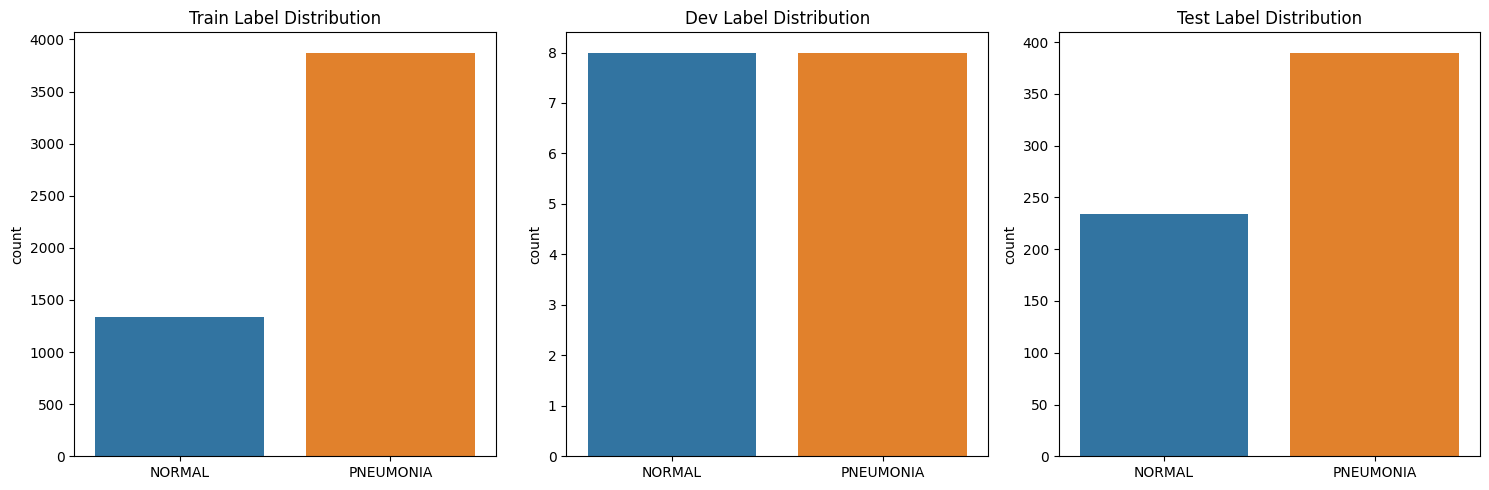

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_label_distribution(y_train, y_dev, y_test):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.countplot(x=y_train, ax=ax[0]).set_title('Train Label Distribution')
    sns.countplot(x=y_dev, ax=ax[1]).set_title('Dev Label Distribution')
    sns.countplot(x=y_test, ax=ax[2]).set_title('Test Label Distribution')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, y_dev, y_test)


d) Hiển thị khoảng 3 bức hình về ảnh X-Quang phổi

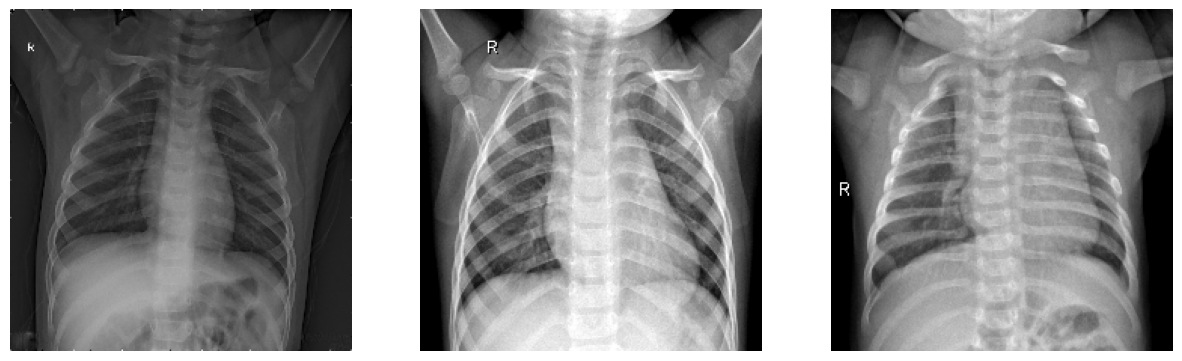

In [6]:
import matplotlib.pyplot as plt

def display_sample_images(X_train):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i in range(3):
        axes[i].imshow(X_train[i])
        axes[i].axis('off')
    plt.show()

display_sample_images(X_train)


### Bài 2: Huấn luyện mô hình bằng phương pháp Logistic Regression </br>

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, IMG_SIZE * IMG_SIZE * 3)) 
X_dev_scaled = scaler.transform(X_dev.reshape(-1, IMG_SIZE * IMG_SIZE * 3))
X_test_scaled = scaler.transform(X_test.reshape(-1, IMG_SIZE * IMG_SIZE * 3))

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy * 100:.2f}%')


Accuracy of Logistic Regression: 75.16%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
import joblib

joblib.dump(log_reg, 'logreg_model.pkl')

['logreg_model.pkl']

### Bài 3: Huấn luyện mô hình bằng phương pháp SVM. </br>

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of SVM: {accuracy_svm * 100:.2f}%')

Accuracy of SVM: 75.48%


In [10]:
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

### Bài 4: So sánh kết quả giữa 2 phân lớp. </br>

In [11]:
from sklearn.metrics import classification_report

# In báo cáo chi tiết về độ chính xác
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.35      0.51       234
   PNEUMONIA       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.67       624
weighted avg       0.81      0.75      0.71       624

SVM Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.36      0.52       234
   PNEUMONIA       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.68      0.68       624
weighted avg       0.81      0.75      0.72       624

